In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

drop_cols=['Unnamed: 0', 'key']
df = df.drop(drop_cols,axis=1)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [4]:
df = df[(df['pickup_latitude']>=-90) & (df['pickup_latitude']<=90)]
df = df[(df['pickup_longitude']>=-90) & (df['pickup_longitude']<=90)]
df = df[(df['dropoff_latitude']>=-90) & (df['dropoff_latitude']<=90)]
df = df[(df['dropoff_longitude']>=-90) & (df['dropoff_longitude']<=90)]

In [5]:
df = df.assign(hour=df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               year=df.pickup_datetime.dt.year,
               month=df.pickup_datetime.dt.month,
               dayofweek=df.pickup_datetime.dt.dayofweek)
drop = ['pickup_datetime']
df = df.drop(drop,axis=1)

In [6]:
q1=df.quantile(0.25)
q2=df.quantile(0.75)
iqr=q2-q1
lb=q1-1.5*iqr
ub=q2+1.5*iqr
outliers=((df<lb)|(df>ub)).any(axis=1)
df2=df[~outliers]

<Axes: >

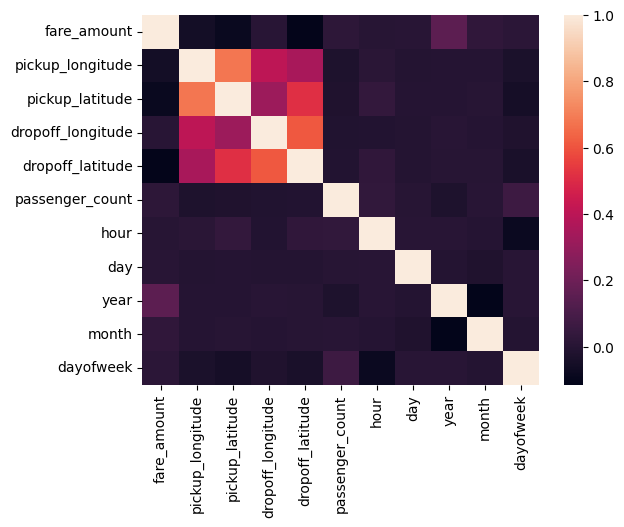

In [7]:
corr=df2.corr()
sns.heatmap(data=corr)

In [11]:
x=df2.drop('fare_amount',axis=1)
y=df2['fare_amount']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test,y_pred))
print("LR RMSE =>")
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.0454515314234345
LR RMSE =>
3.844009170606115


In [9]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

print(r2_score(y_test,y_pred2))
print("RF RMSE =>")
print(np.sqrt(mean_squared_error(y_test,y_pred2)))

0.7676391738297818
RF RMSE =>
1.8965612741402587
